In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lzma
import pickle

from matplotlib.lines import Line2D

In [38]:
load_Dir = "../Data/"

In [39]:
#file_name = "DF_20250217-c0_a2.xz"
file_name = "DF_20250521-110942_253.xz"
with lzma.open(load_Dir + file_name, "rb") as f:
    data_frame_tot = pickle.load(f)
data_frame_tot[r"$\rho$"] = data_frame_tot["M"]

In [40]:
# select data from data_frame_tot in such a way that MO - O is smaller than 0.1
df = data_frame_tot[(data_frame_tot[r"$\widetilde{MO}_{t=0}$"] - data_frame_tot[r"$\widetilde{O}_{t=0}$"]) <0.007]
#df2 = data_frame_tot[(data_frame_tot[r"$\widetilde{MO}_{t=0}$"] - data_frame_tot[r"$\widetilde{O}_{t=0}$"]) <0.1]
len(df)

462

In [41]:
file_name = "DF_20250723-154101_593.xz"
with lzma.open(load_Dir + file_name, "rb") as f:
    data_frame_tot = pickle.load(f)
data_frame_tot[r"$\rho$"] = data_frame_tot["M"]
df2 = data_frame_tot[(data_frame_tot[r"$\widetilde{MO}_{t=0}$"] - data_frame_tot[r"$\widetilde{O}_{t=0}$"]) < 0.1]

In [47]:
data_frame_tot[data_frame_tot[r"$N$"]==(500000)][r"$M$"].unique()

array([5000])

In [48]:
df2 = data_frame_tot[data_frame_tot[r"$N$"] == 500000]

In [49]:
# select data from df2 in such a way that MO - O is smaller than 0.1
l = len(df2)
df2 = df2[(df2[r"$\widetilde{MO}_{t=0}$"] - df2[r"$\widetilde{O}_{t=0}$"]) <0.0005]
(l-len(df2))/l

0.47878787878787876

Text(0, 0.5, '$\\widetilde{O}_{t=0}$')

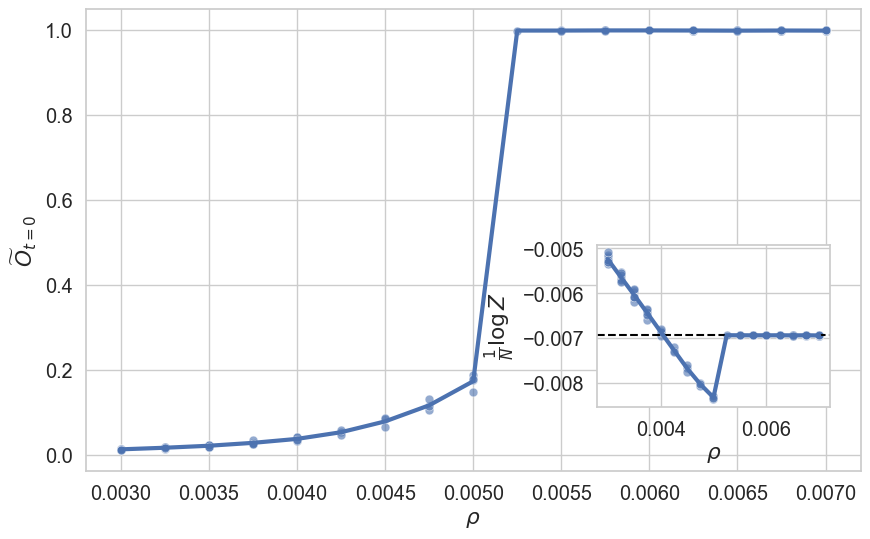

In [52]:
fig, ax = plt.subplots( figsize=(10, 6))
y_s = "$\widetilde{O}_{t=0}$"
sns.lineplot(data=df2,x=r"$\rho$",y=y_s, errorbar=None, linewidth=3, ax=ax)
sns.scatterplot(data=df2,x=r"$\rho$",y=y_s, alpha=0.6, s=40, ax=ax)
#plot of logZ vs rho as inset
axins = ax.inset_axes([0.66, 0.14, 0.3, 0.35])  # [x, y, width, height]
axins.axhline(-np.log(2)/100, color='black', linestyle='--')
sns.lineplot(data=df2,x=r"$\rho$",y="total_free_entropy", ax=axins, errorbar=None, linewidth=3)
sns.scatterplot(data=df2,x=r"$\rho$",y="total_free_entropy", alpha=0.6, s=40, ax=axins)
axins.set_xlabel(r"$\rho$")
axins.set_ylabel(r"$\frac{1}{N}\log Z$")
#axins.set_xticks([0.08, 0.13 , 0.18])
#axins.set_yticks([-0.09, -0.11, -0.13])
ax.set_xlabel(r"$\rho$")
ax.set_ylabel(r"$\widetilde{O}_{t=0}$")

#fig.savefig("zoom_c0_alpha10.pdf")

### Together

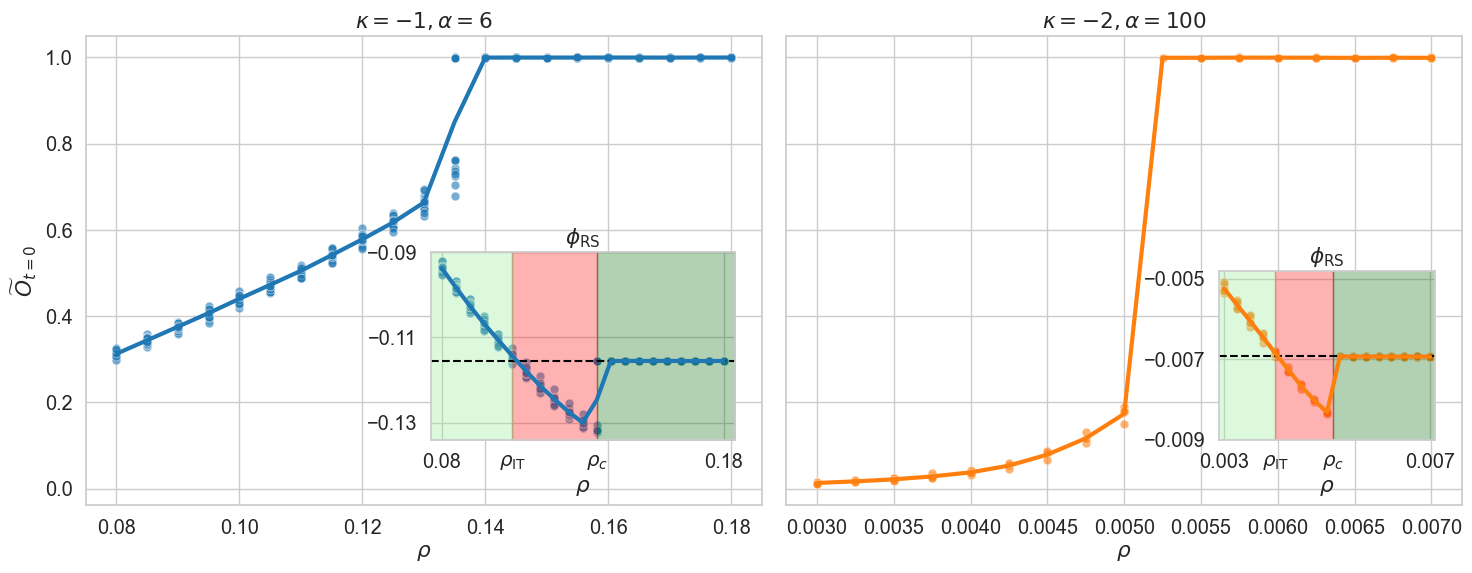

In [54]:
# Put the last plots for c=0 and c=1 in the same figure, side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
#fig.suptitle(r'$\alpha=10$')
y_s = r"$\widetilde{O}_{t=0}$"
axs[1].set_title(r'$\kappa=-2, \alpha=100$')
sns.lineplot(data=df2,x=r"$\rho$",y=y_s, errorbar=None, linewidth=3, ax=axs[1],color="tab:orange")
sns.scatterplot(data=df2,x=r"$\rho$",y=y_s, alpha=0.6, s=40, ax=axs[1],color="tab:orange")
#plot of logZ vs rho as inset
axins = axs[1].inset_axes([0.64, 0.14, 0.32, 0.36])  # [x, y, width, height]
axins.axhline(-np.log(2)/100, color='black', linestyle='--')
sns.lineplot(data=df2,x=r"$\rho$",y="total_free_entropy", ax=axins, errorbar=None, linewidth=3,color="tab:orange")
sns.scatterplot(data=df2,x=r"$\rho$",y="total_free_entropy", alpha=0.6, s=40, ax=axins,color="tab:orange")
x = [0.004,0.005125]
y = [0,-1]
axins.fill_between(x, y[0], y[1], color='red', alpha=0.3)
x = [0.,0.004]
y = [0,-1]
axins.fill_between(x, y[0], y[1], color='lightgreen', alpha=0.3)
x = [0.005125,1.]
y = [0,-1]
axins.fill_between(x, y[0], y[1], color='darkgreen', alpha=0.3)
axins.set_xlabel(r"$\rho$")
axins.set_ylabel("")
axins.set_title(r"$\phi_{\rm RS}$")
axins.set_xticks([0.003, 0.004, 0.005125 , 0.007])
axins.set_xticklabels([0.003, r"$\rho_{\rm IT}$", r"$\rho_{c}$", 0.007])
axins.set_yticks([-0.005, -0.007, -0.009])
axins.set_xlim(0.0029,0.0071)
axins.set_ylim(-0.009,-0.0048)
axs[1].set_xlabel(r"$\rho$")
axs[1].set_ylabel(r"$\widetilde{O}_{t=0}$")
#plot of overlap vs rho
axs[0].set_title(r'$\kappa=-1, \alpha=6$')
sns.lineplot(data=df[df[r"$N$"]==120000],x=r"$\rho$",y=y_s, errorbar=None, linewidth=3, ax=axs[0],color="tab:blue")
sns.scatterplot(data=df[df[r"$N$"]==120000],x=r"$\rho$",y=y_s, alpha=0.6, s=40, ax=axs[0],color="tab:blue")
#plot of logZ vs rho as inset
axins = axs[0].inset_axes([0.51, 0.14, 0.45, 0.4])  # [x, y, width, height]
axins.axhline(-np.log(2)/6, color='black', linestyle='--')
sns.lineplot(data=df[df[r"$N$"]==120000],x=r"$\rho$",y="total_free_entropy", ax=axins, errorbar=None, linewidth=3,color="tab:blue")
sns.scatterplot(data=df[df[r"$N$"]==120000],x=r"$\rho$",y="total_free_entropy", alpha=0.6, s=40, ax=axins,color="tab:blue")
x = [0.105,0.135]
y = [-0.134,-0.09]
axins.fill_between(x, y[0], y[1], color='red', alpha=0.3)
x = [0.076,0.105]
y = [-0.134,-0.09]
axins.fill_between(x, y[0], y[1], color='lightgreen', alpha=0.3)
x = [0.135,0.184]
y = [-0.134,-0.09]
axins.fill_between(x, y[0], y[1], color='darkgreen', alpha=0.3)
axins.set_xlabel(r"$\rho$")
axins.set_ylabel("")
axins.set_title(r"$\phi_{\rm RS}$")
axins.set_xticks([0.08, 0.105, 0.135 , 0.18])
axins.set_xticklabels([0.08, r"$\rho_{\rm IT}$", r"$\rho_{c}$", 0.18])
axins.set_yticks([-0.09, -0.11, -0.13])
axins.set_xlim(0.076,0.184)
axins.set_ylim(-0.134,-0.09)
axs[0].set_xlabel(r"$\rho$")
axs[0].set_ylabel(r"$\widetilde{O}_{t=0}$")
fig.tight_layout()
fig.savefig("../Plots/Figure5.pdf")